<a href="https://colab.research.google.com/github/LIMDANBI/SKTFLYAI/blob/main/DL/logistic_regression_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
x = np.array([2,4,6,8,10,12,14])
y = np.array([0,0,0,1,1,1,1])

In [16]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(x, y, epochs=5000)

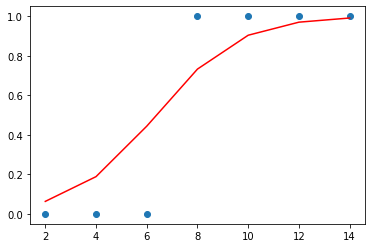

In [12]:
plt.scatter(x,y)
plt.plot(x, model.predict(x), 'r')
plt.show()

In [15]:
hour = 7
prediction = model.predict([hour])
print('{}시간 공부할 경우, 예상 합격률은 {:.1f} 입니다.'.format(hour, prediction.item()*100))

7시간 공부할 경우, 예상 합격률은 59.7 입니다.


# 실습 - 심부전 예측
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

### feature 설명 
age: 환자의 나이 <br>
anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈) <br>
creatinine_phosphokinase: 크레아틴키나제 검사 결과 <br>
diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨) <br>
ejection_fraction: 박출계수 (%) <br>
high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압) <br>
platelets: 혈소판 수 (kiloplatelets/mL) <br>
serum_creatinine: 혈중 크레아틴 레벨 (mg/dL) <br>
serum_sodium: 혈중 나트륨 레벨 (mEq/L) <br>
sex: 성별 (0: 여성, 1: 남성) <br>
smoking: 흡연 여부 (0: 비흡연, 1: 흡연) <br>
time: 관찰 기간 (일) <br>
DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망) <br>

In [101]:
import pandas as pd

## 데이터 불러오기

In [102]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [103]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## MinMaxScaler
(x - 최소값) / (최대값 - 최소값)

In [104]:
for col in df.columns:
  df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206,0.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    float64
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    float64
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    float64
 10  smoking                   299 non-null    float64
 11  time                      299 non-null    float64
 12  DEATH_EVENT               299 non-null    float64
dtypes: float64(13)
memory usage: 30.5 KB


## Feature - Label 분리

In [106]:
Y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis = 1)

## 모델링

In [107]:
model = Sequential()
model.add(Dense(1, input_dim=12, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X, Y, epochs=1000)

Epoch 1/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7350
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7330
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7313
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7296
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7278
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7262
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7245
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7228
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7212
Epoch 10/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7196
Epoch 11/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.7182
Epoch 12/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.7164
Epoch 13/1000
10/10 [====

## 예측

In [116]:
myPatient = [[0.281818, 0.0, 0.022072, 0.0,	0.469697, 0.0, 0.448418, 0.123596, 0.657143, 1.0, 1.0, 1.000000]]
print("해당 환자의 사망 확률은 {:.2f}%입니다.".format(model.predict(myPatient).item()*100))

해당 환자의 사망 확률은 1.44%입니다.
